## D7041E - Mini project: Human Real-time Detection

### Group: Laura Bermejo, Lina Borg, Julie Labbé

#### References and sources
For the training of our model, we got inspired by this video: https://www.youtube.com/watch?v=V4Kkrz__hvo.

#### Requirements
The required libraries are super-gradient (for model), roboflow (for dataset) and supervision (for bounding boxes).

In [6]:
#%pip install -q super-gradients
#%pip install -q roboflow
#%pip install -q supervision

#### Dataset

##### Code to download the dataset

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="DNm47rTel6WBxKZqAd9T")
project = rf.workspace("capricon").project("human-detection-q0nit")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


#### class Config Class definition

In [8]:
from typing import List, Dict

class config:
  #Project paths
  DATA_DIR: str = "Human-Detection-2"
  CHECKPOINT_DIR: str = "/checkpoints"
  EXPERIMENT_NAME: str = "Project"

  #Datasets
  TRAIN_IMAGES_DIR: str ="train/images"
  TRAIN_LABELS_DIR: str = "train/labels"
  VAL_IMAGES_DIR: str = "valid/images"
  VAL_LABELS_DIR: str = "valid/labels"
  TEST_IMAGES_DIR: str = "test/images"
  TEST_LABELS_DIR: str = "test/labels"

  #Classes
  CLASSES: List[str] = ["human", "vehicle"]
  NUM_CLASSES: int = 2

  #Model 1
  # DEFINE HYPERPARAMETERS, YOU WILL HAVE TO CHANGE IT
  DATALOADER_PARAMS: Dict = {
      'batch_size':16,
      'num_workers':0
  }
  # THIS IS ALREADY SET, CHANGE ONLY DATALOADER PARAMS
  MODEL_NAME: str = 'yolo_nas_l'
  PRETRAINED_WEIGHTS: str ='coco'

#### Dataloaders initialization

In [9]:
from IPython.display import clear_output
from typing import List, Dict
from super_gradients.training import models
from super_gradients.training import Trainer
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_val
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback
from typing import List, Dict
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_val

In [10]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

Extracting Dataset Version Zip to Human-Detection-2 in yolov5pytorch:: 100%|██████████| 376/376 [00:00<00:00, 6911.31it/s]


[2024-01-08 11:57:06] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 159/159 [00:00<00:00, 10875.82it/s]
[2024-01-08 11:57:06] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 159/159 [00:00<00:00, 11992.35it/s]
[2024-01-08 11:57:06] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:   0%|          | 0/159 [00:00<?, ?it/s]

Indexing dataset annotations: 100%|██████████| 159/159 [00:00<00:00, 11933.55it/s]


#### Visualization

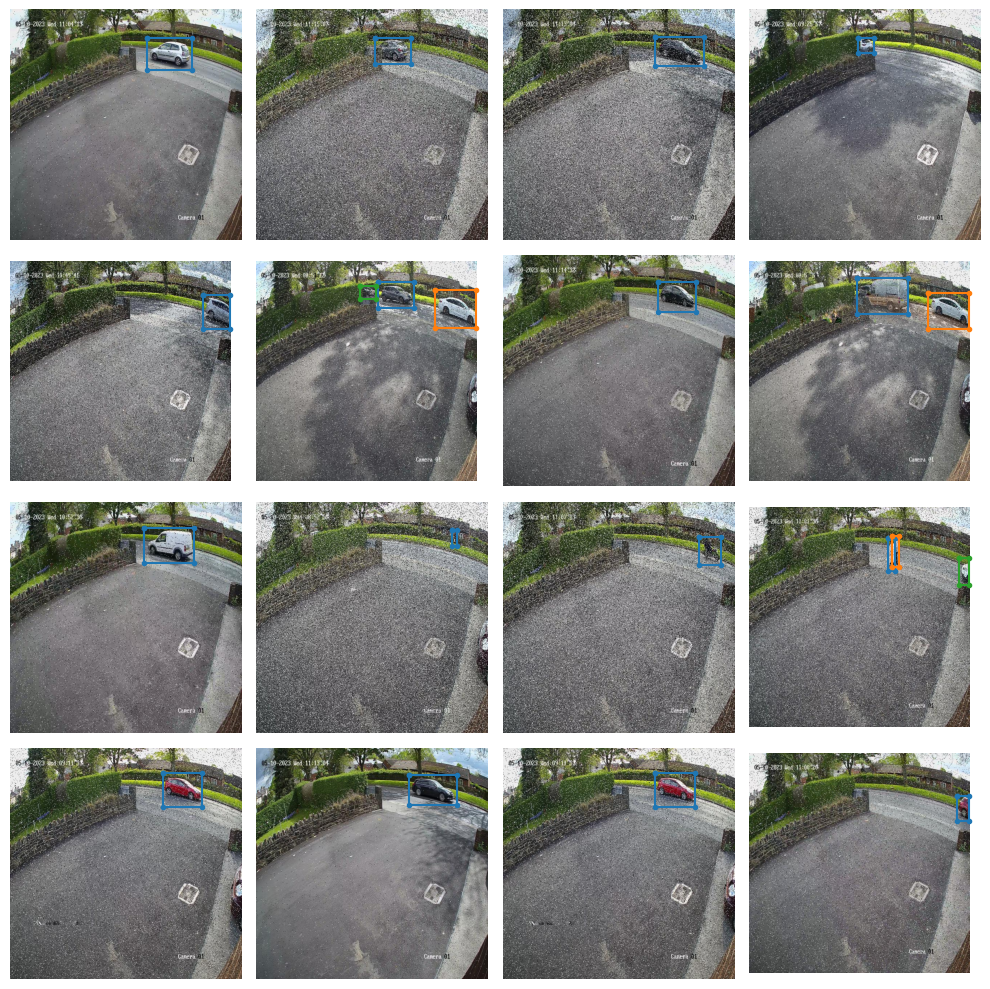

In [11]:
val_data.dataset.plot()

#### Training hyperparameters

In [ ]:
# YOU HAVE TO SET THE HYPERPARAMETERS IN THIS VARIABLE
train_params = {}

#### Training

##### Download the model

In [12]:
model = models.get(config.MODEL_NAME, num_classes=config.NUM_CLASSES, pretrained_weights=config.PRETRAINED_WEIGHTS)

[2024-01-08 12:08:46] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /home/usuario/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:22<00:00, 11.8MB/s] 
[2024-01-08 12:09:13] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


##### Initialize training

In [13]:
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME, ckpt_root_dir=config.CHECKPOINT_DIR)

##### Train

In [ ]:
trainer.train(model=model, training_params=train_params, train_loader=train_data, valid_loader=val_data)